<a href="https://colab.research.google.com/github/2173882Diana/Inteligencia-Artificial-y-Redes-Neuronales/blob/main/Proyecto%20final/Decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Importar librerías y base de datos**

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('water_potability.csv')

In [ ]:
df.head()

,ph,Conductivity,Turbidity,Potability
0,NaN,564.308654,2.963135,0
1,3.716080,592.885359,4.500656,0
2,8.099124,418.606213,3.055934,0
3,8.316766,363.266516,4.628771,0
4,9.092223,398.410813,4.075075,0


In [ ]:
print(df.isnull().sum())

ph              491
Conductivity      0
Turbidity         0
Potability        0
dtype: int64


In [ ]:
df['ph'] = df['ph'].fillna(df['ph'].mean())

**2. Carga de Datos**

In [ ]:
X = df[["ph", "Conductivity", "Turbidity"]]
y = df["Potability"]

In [ ]:
Potability_names = ["No potable", "Potable"]

**3. Preprocesamiento**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

**4. Selección y entrenamiento del modelo**

In [ ]:
clf=DecisionTreeClassifier()

In [ ]:
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
#Exactitud del modelo
train_accuracy = clf.score(x_train, y_train)
print(train_accuracy)

1.0


**5. Prueba del modelo**

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
#Obtener la matriz de confusión
conf_matrix=confusion_matrix(y_test, y_pred)

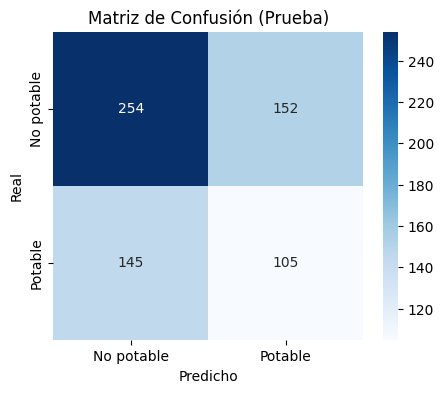

In [ ]:
#Mostrar la matriz de confusión de resultados de la prueba
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No potable', 'Potable'], yticklabels=['No potable', 'Potable'])
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión (Prueba)')
plt.savefig("confusion_matrix.png", dpi=300)
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=Potability_names))

Accuracy: 0.5472560975609756
Classification Report:
               precision    recall  f1-score   support

  No potable       0.64      0.63      0.63       406
     Potable       0.41      0.42      0.41       250

    accuracy                           0.55       656
   macro avg       0.52      0.52      0.52       656
weighted avg       0.55      0.55      0.55       656



**ÁRBOL DE DECISIÓN**

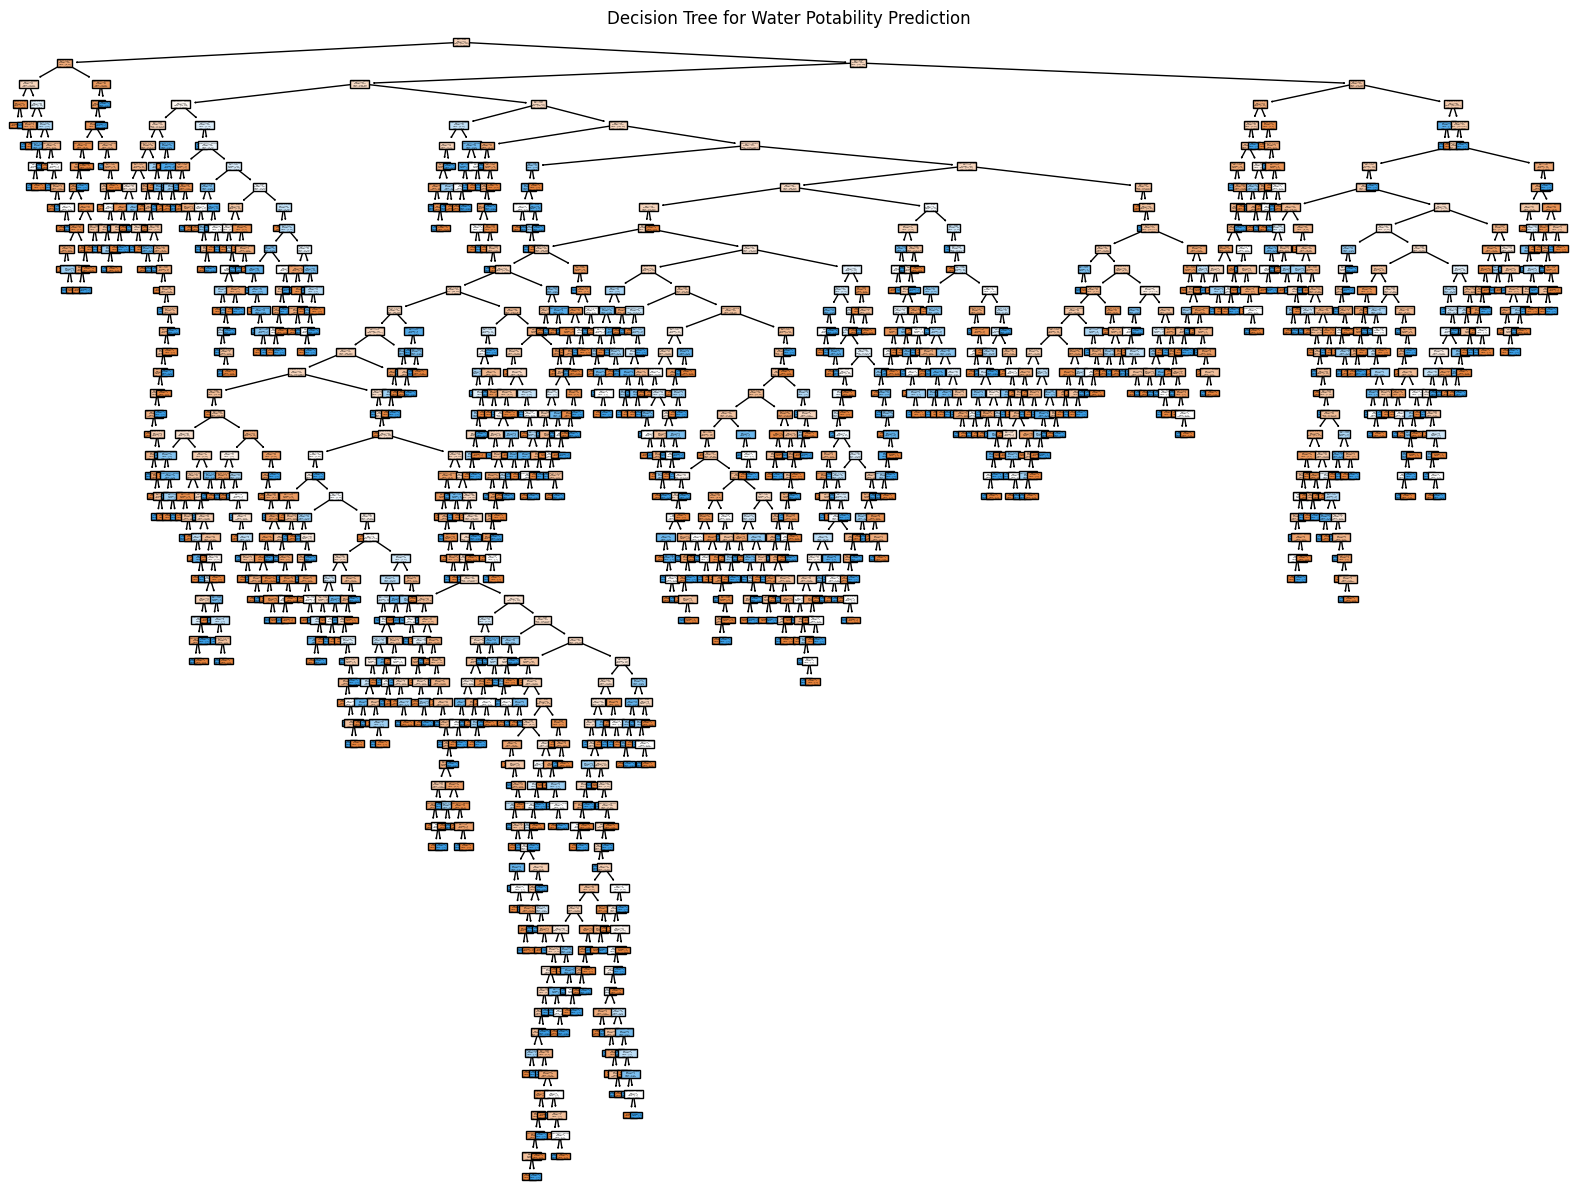

In [ ]:
plt.figure(figsize=(20,15))
tree.plot_tree(clf, feature_names=x.columns, class_names=Potability_names, filled=True)
plt.title("Decision Tree for Water Potability Prediction")
plt.savefig("Water Potability.png", dpi=300)
plt.show()